In [ ]:
#supressing the warnings
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Setting display options for the rows and columns
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:0.3f}'.format)

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Data Reading and Understanding

In [ ]:
# importing/reading the csv file
path = '/content/gdrive/MyDrive/E Commerce Capstone Project/Project FIles/camera_accessories.csv'
cam_df = pd.read_csv(path)
cam_df.head()

,Unnamed: 0,week,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,0,1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,24.000,24.000,3.208,2.542,965.292,1.000,421.375,421.375,46.355,965.292,0.000,0.000
1,1,2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2098.000,2130.000,7.366,2.508,914.269,1.000,444.974,444.974,45.287,914.269,1459.000,0.000
2,2,3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2243.000,2268.000,6.716,2.524,967.026,1.000,449.302,449.302,45.778,967.026,1557.000,0.000
3,3,4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2226.000,2256.000,6.770,2.525,952.331,1.000,445.664,445.664,44.456,952.331,1591.000,0.000
4,4,5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000,1483.000,1507.000,6.639,2.546,977.362,1.000,457.440,457.440,44.936,977.362,1101.000,0.000


In [ ]:
# Dropping  unimportant columns

cam_df.drop(columns=['Unnamed: 0', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [ ]:
cam_df.shape

(52, 45)

In [ ]:
cam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   week                     52 non-null     int64  
 1   special_sale             52 non-null     float64
 2   Payday                   52 non-null     float64
 3   Max Temp (°C)            52 non-null     float64
 4   Min Temp (°C)            52 non-null     float64
 5   Mean Temp (°C)           52 non-null     float64
 6   Heat Deg Days (°C)       52 non-null     float64
 7   Cool Deg Days (°C)       52 non-null     float64
 8   Total Rain (mm)          52 non-null     float64
 9   Total Snow (cm)          52 non-null     float64
 10  Total Precip (mm)        52 non-null     float64
 11  Snow on Grnd (cm)        52 non-null     float64
 12  NPS                      52 non-null     float64
 13  Stock_Index              52 non-null     float64
 14  Total Investment         52 

In [ ]:
# Treating the Null values
for col in ['order_id','order_item_id', 'sla', 'product_procurement_sla', 'product_mrp', 
 'units', 'gmv', 'listed_price', 'discount_percent', 'total_price', 'COD', 'luxury_product']:
  cam_df[col].fillna(cam_df[col].mean(), inplace=True)

cam_df.isna().sum()


week                       0
special_sale               0
Payday                     0
Max Temp (°C)              0
Min Temp (°C)              0
Mean Temp (°C)             0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Total Precip (mm)          0
Snow on Grnd (cm)          0
NPS                        0
Stock_Index                0
Total Investment           0
TV                         0
Digital                    0
Sponsorship                0
Content                    0
Online                     0
Affiliates                 0
SEM                        0
Radio                      0
Other                      0
TV_adstock                 0
Digital_adstock            0
Sponsorship_adstock        0
Content_adstock            0
Online_adstock             0
Affiliates_adstock         0
SEM_adstock                0
Radio_adstock              0
Other_adstock              0
order_id                   0
order_item_id 

# EDA

In [ ]:
cam_df.columns

Index(['week', 'special_sale', 'Payday', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock_Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content', 'Online', 'Affiliates', 'SEM',
       'Radio', 'Other', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'Content_adstock', 'Online_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'order_id', 'order_item_id', 'sla', 'product_procurement_sla',
       'product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent',
       'total_price', 'COD', 'luxury_product'],
      dtype='object')

In [ ]:
# Sepearating the KPI's to their categories

pricing_kpi =  ['product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent', 'total_price', 'special_sale', 'Payday', 'COD']
adv_kpi =      ['TV', 'Digital', 'Sponsorship', 'Content', 'Online', 'Affiliates', 'SEM', 'Radio', 'Other'] 
ad_stock_kpi = ['TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',  'Content_adstock', 'Online_adstock',
                'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock']
other_kpi =        ['sla', 'product_procurement_sla', 'NPS', 'Stock_Index']
climate_Kpi =  ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
               'Total Rain (mm)',  'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']


In [ ]:
# Reodering the important KPI's

cols = ['week', 'product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent', 'total_price', 'special_sale', 'Payday', 'COD',
        'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',  'Content_adstock', 'Online_adstock','Affiliates_adstock', 
        'SEM_adstock', 'Radio_adstock', 'Other_adstock', 'sla', 'product_procurement_sla', 'NPS', 'Stock_Index', 
        'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 
        'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',  'Total Snow (cm)', 'Total Precip (mm)', 
        'Snow on Grnd (cm)']

In [ ]:
cam_df = cam_df[cols]
cam_df.head()

,week,product_mrp,units,gmv,listed_price,discount_percent,total_price,special_sale,Payday,COD,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,sla,product_procurement_sla,NPS,Stock_Index,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,1,965.292,1.000,421.375,421.375,46.355,965.292,0.000,0.200,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,3.208,2.542,54.600,1177.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000
1,2,914.269,1.000,444.974,444.974,45.287,914.269,0.000,0.000,1459.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,7.366,2.508,54.600,1177.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041
2,3,967.026,1.000,449.302,449.302,45.778,967.026,0.286,0.143,1557.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,6.716,2.524,54.600,1177.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041
3,4,952.331,1.000,445.664,445.664,44.456,952.331,0.000,0.000,1591.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,6.770,2.525,54.600,1177.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041
4,5,977.362,1.000,457.440,457.440,44.936,977.362,0.000,0.143,1101.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000,6.639,2.546,56.139,1185.286,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041


In [ ]:
# Converting the bi-categorical features to binary feature

cam_df['Payday'] = cam_df['Payday'].apply(lambda x: 1 if x>0 else 0)
cam_df['special_sale'] = cam_df['special_sale'].apply(lambda x: 1 if x>0 else 0)

## Univariate Analysis

### Seeing the distribution of the different numeric features

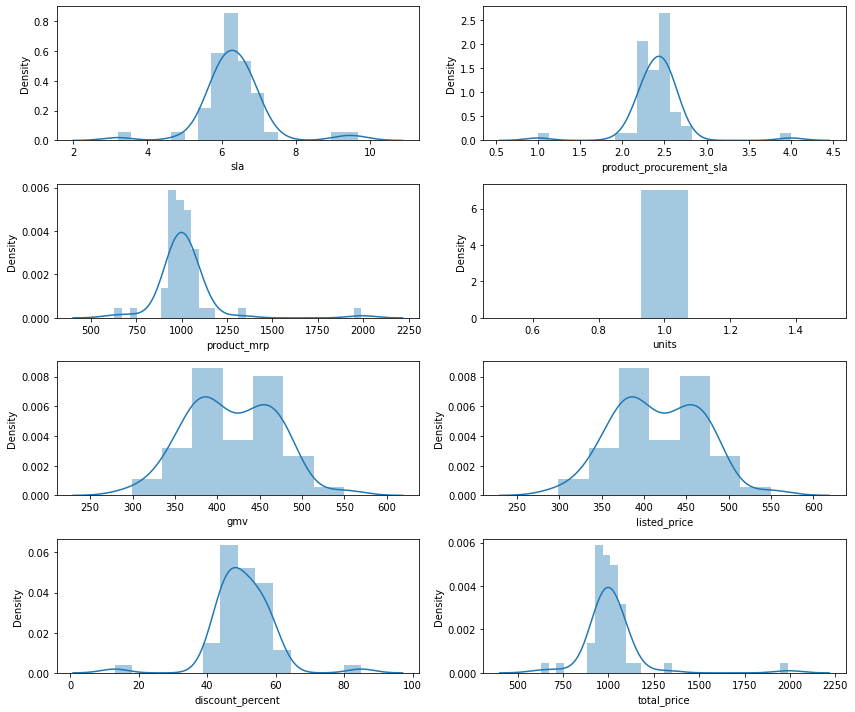

In [ ]:
# Price related features

features = ['sla', 'product_procurement_sla', 'product_mrp', 'units', 
            'gmv', 'listed_price', 'discount_percent', 'total_price']

plt.figure(figsize=(12,10))
for i, col in enumerate(features):
  plt.subplot(4, 2, i+1)
  sns.distplot(cam_df[col])

plt.tight_layout()


Most of the features are noramlly distribted

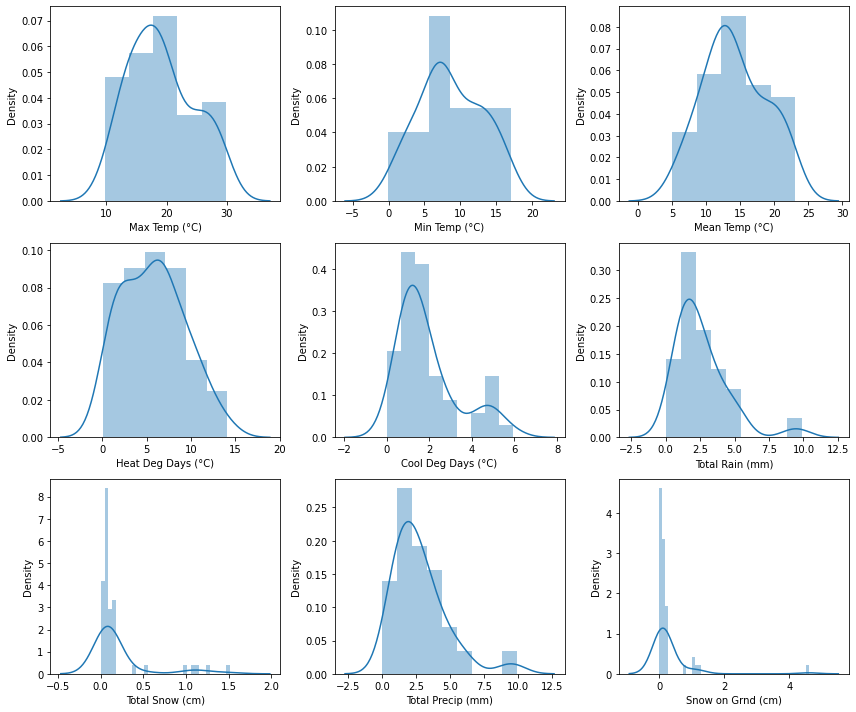

In [ ]:
# Climate Related features

features =  ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

plt.figure(figsize=(12,10))
for i, col in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.distplot(cam_df[col])

plt.tight_layout()



*   All the climate realated features are normally distributed
*   Though the year of time, the average rainfall is about 2.5mm
*   The average temperature is about 13 degree C, which makes it a cool country
*   Being the coldest country there is much snowfall in the Ontario






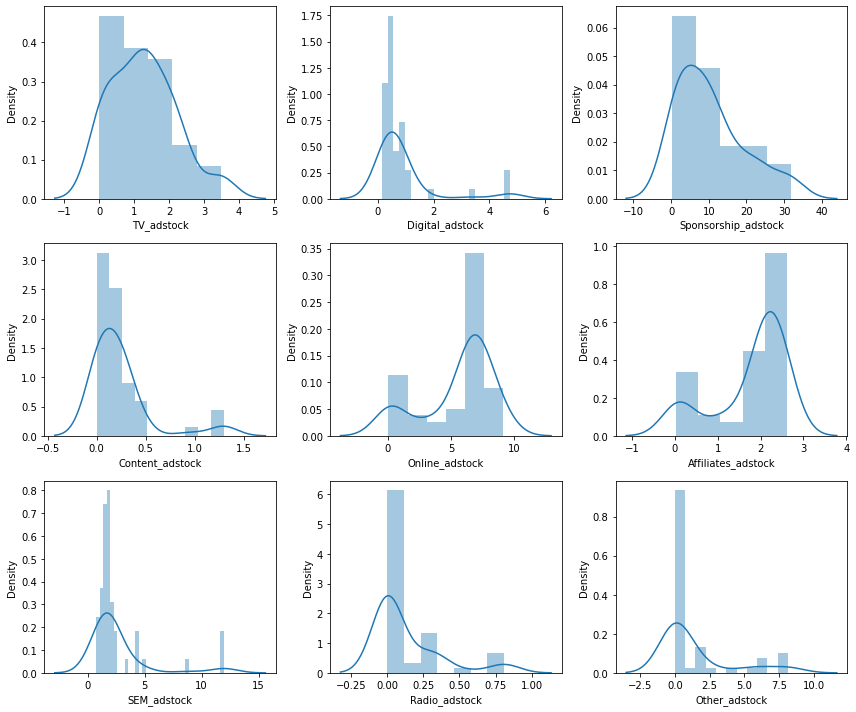

In [ ]:
# Advertising or Marketing related

features =  [  'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',  'Content_adstock', 'Online_adstock',
                'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock']
plt.figure(figsize=(12,10))
for i, col in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.distplot(cam_df[col])

plt.tight_layout()



*   TV adstock has less impression for the Camera products about 2 days, which is unusual

*   Sponsership and online has higher impression of about 7to8 days then any other



## Bi-Variate Analysis

### Behavior / trend of the various features over the weeks

In [ ]:
# # order_id and order_item_id over the week

# features = ['order_id', 'order_item_id']

# plt.figure(figsize=(12,10))
# for i, col in enumerate(features):
#   plt.subplot(2, 1, i+1)
#   sns.barplot(cam_df['week'], cam_df[col])

# plt.tight_layout()

In [ ]:
pricing_kpi

['product_mrp',
 'units',
 'gmv',
 'listed_price',
 'discount_percent',
 'total_price',
 'special_sale',
 'Payday',
 'COD']

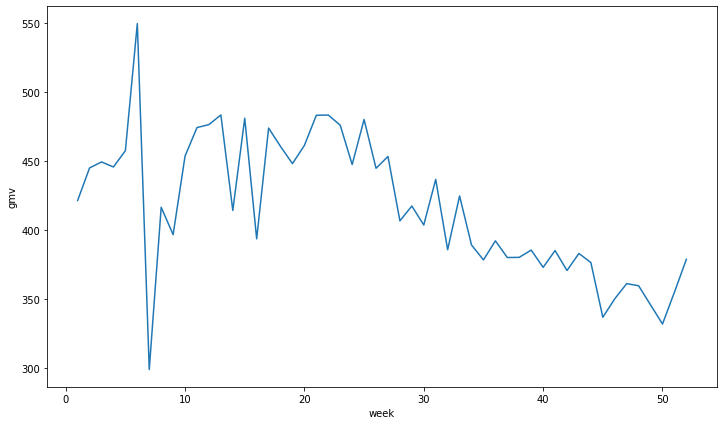

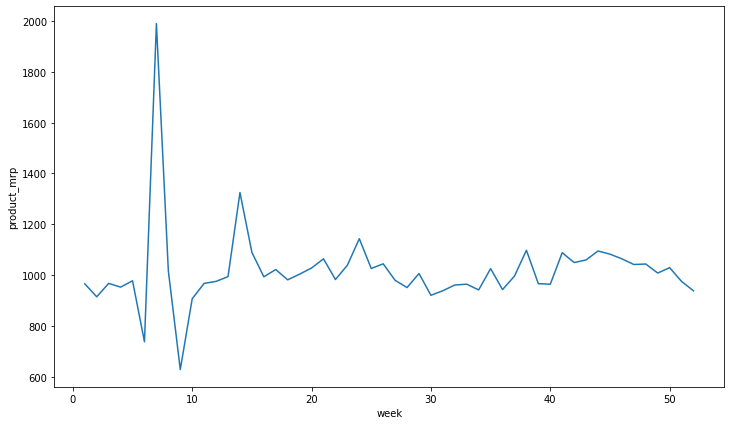

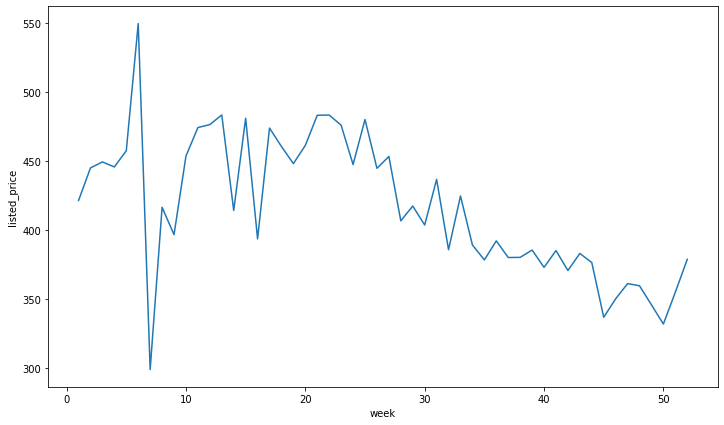

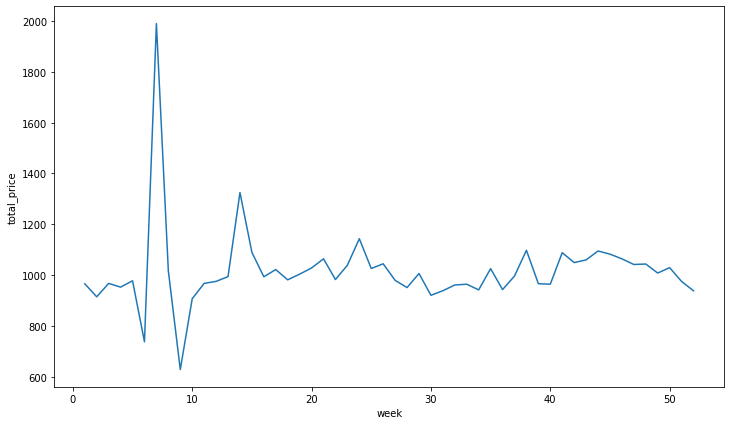

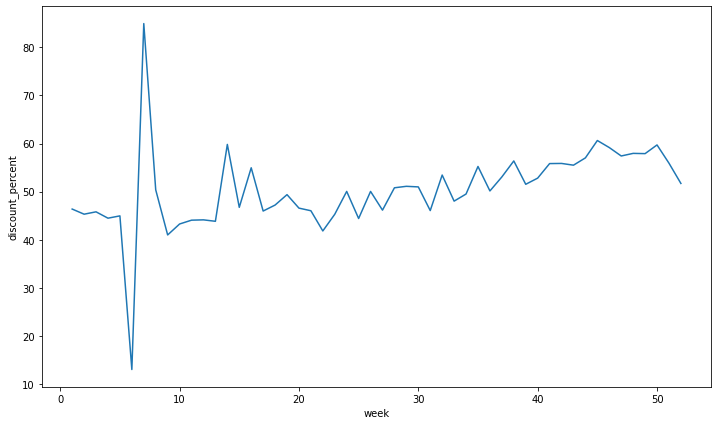

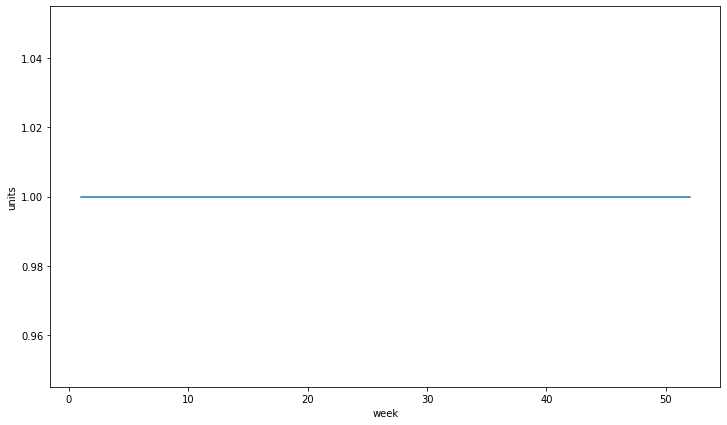

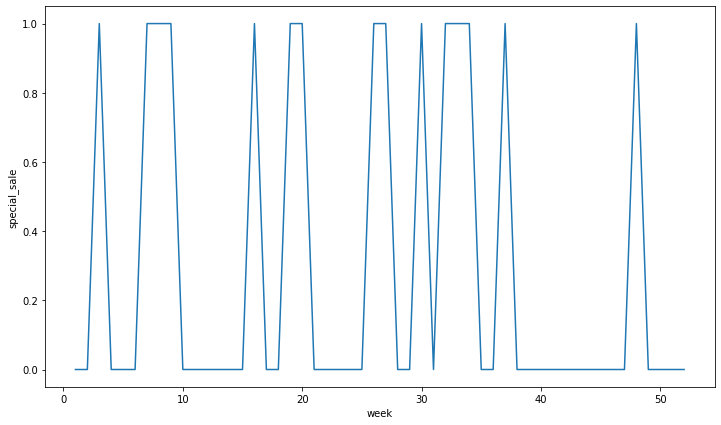

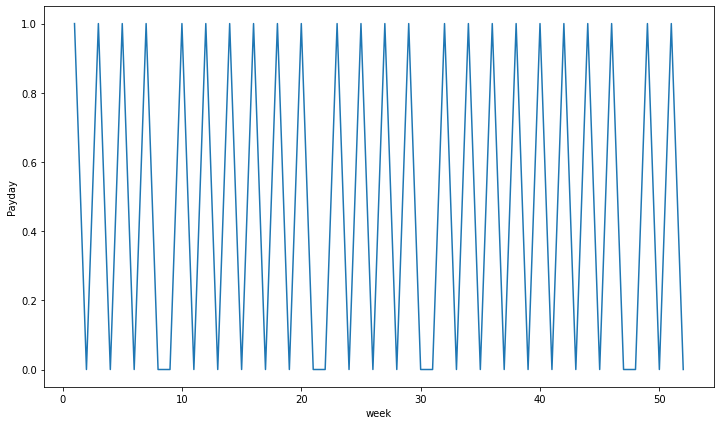

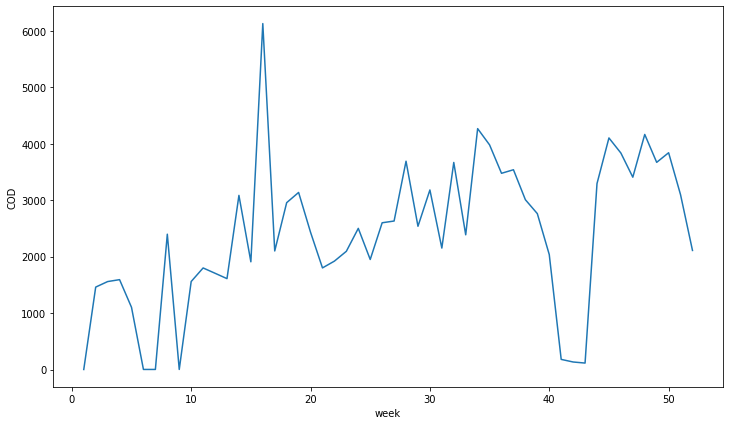

In [ ]:
# GMV, Sale, discount, listed_price, total_price, SLA over the different weeks

features = ['gmv', 'product_mrp', 'listed_price', 'total_price', 'discount_percent', 'units',
            'special_sale', 'Payday', 'COD']

for col in features:
  plt.figure(figsize=(12, 7))
  sns.lineplot(cam_df['week'], cam_df[col])
  plt.show()



*   On the 18th week there is steep increase in the COD order and, between 41 and 43 their steep fall in COD orders
*   On 6th week there is increase in the GMV or revenue



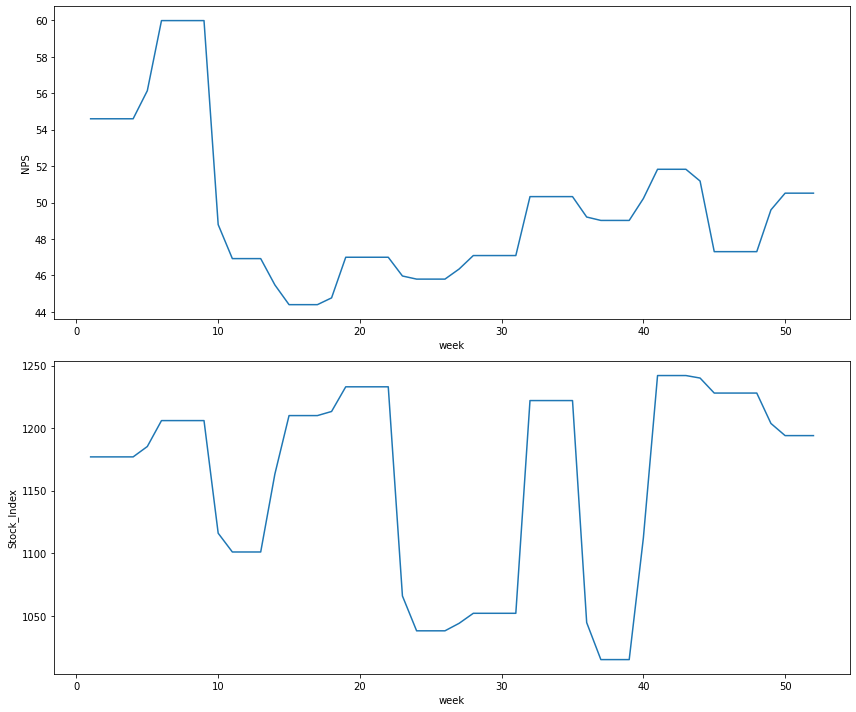

In [ ]:
# NPS, stock_index over the weeks

features = ['NPS', 'Stock_Index']

plt.figure(figsize=(12,10))
for i, col in enumerate(features):
  plt.subplot(2, 1, i+1)
  sns.lineplot(cam_df['week'], cam_df[col])

plt.tight_layout()

Between 6th and 10th week the brand value or nps of the company is good

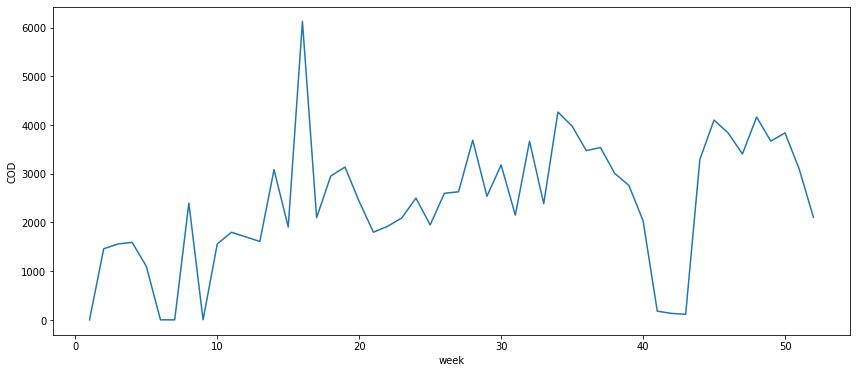

In [ ]:
# COD over the weeks

features = ['COD']
plt.figure(figsize=(12,10))
for i, col in enumerate(features):
  plt.subplot(2, 1, i+1)
  sns.lineplot(cam_df['week'], cam_df[col])

plt.tight_layout()

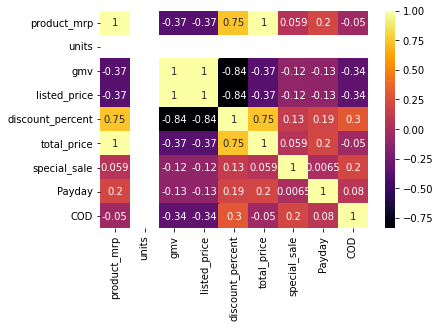

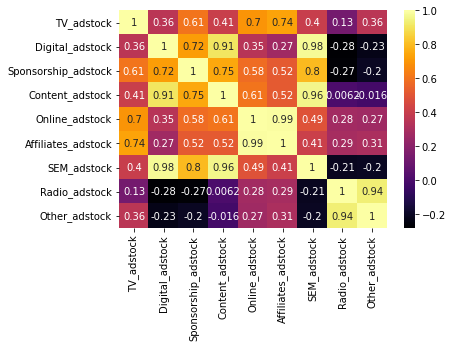

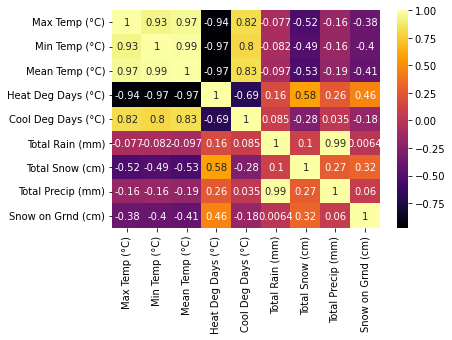

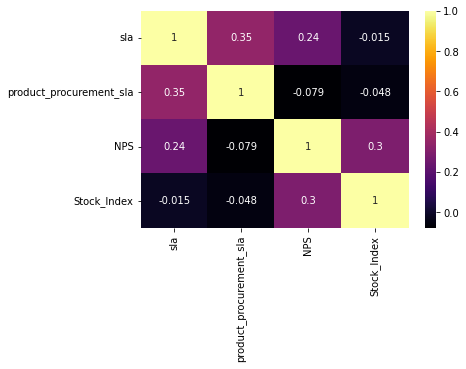

In [ ]:
# Correlation feturewise


kpis = [pricing_kpi, ad_stock_kpi, climate_Kpi, other_kpi]

for k in kpis:
  # plt.figure(figsize=())
  sns.heatmap(cam_df[k].corr(), cmap='inferno', annot=True)
  plt.show()

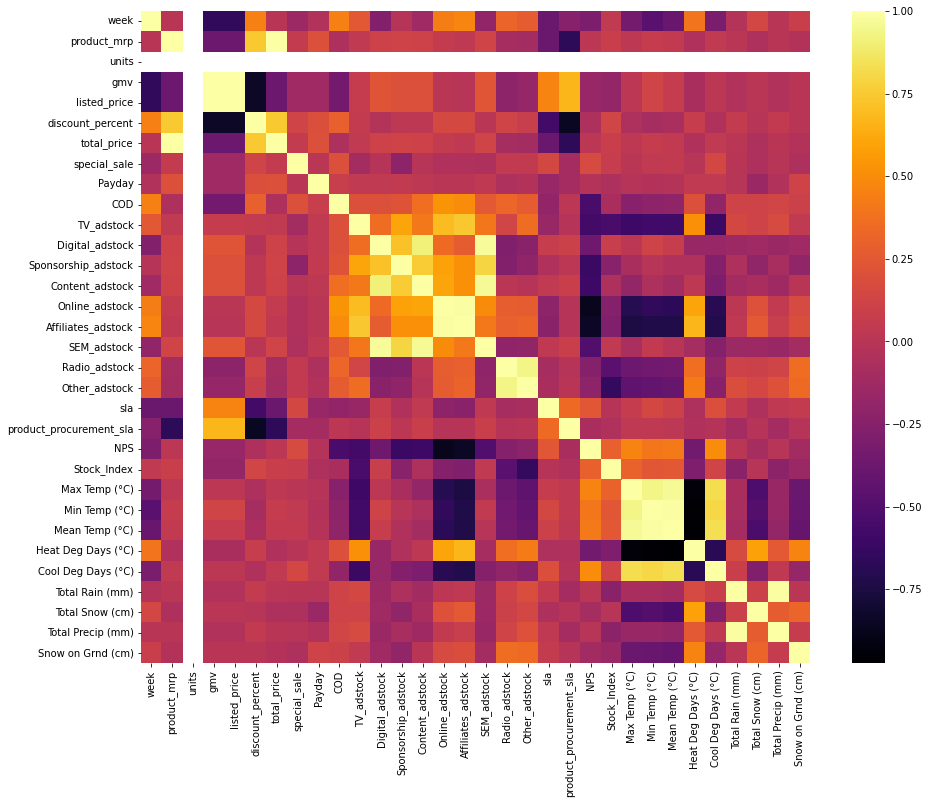

In [ ]:
# Correlation of the important features

plt.figure(figsize=(15, 12))
sns.heatmap(cam_df.corr(), cmap='inferno')
plt.show()

In [ ]:
cam_df.columns

Index(['week', 'product_mrp', 'units', 'gmv', 'listed_price',
       'discount_percent', 'total_price', 'special_sale', 'Payday', 'COD',
       'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content_adstock', 'Online_adstock', 'Affiliates_adstock',
       'SEM_adstock', 'Radio_adstock', 'Other_adstock', 'sla',
       'product_procurement_sla', 'NPS', 'Stock_Index', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

# Model Building

## Mutiple Linear Regression

In [ ]:
cam_df.head()

,week,product_mrp,units,gmv,listed_price,discount_percent,total_price,special_sale,Payday,COD,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,sla,product_procurement_sla,NPS,Stock_Index,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,1,965.292,1.000,421.375,421.375,46.355,965.292,0,1,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,3.208,2.542,54.600,1177.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000
1,2,914.269,1.000,444.974,444.974,45.287,914.269,0,0,1459.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,7.366,2.508,54.600,1177.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041
2,3,967.026,1.000,449.302,449.302,45.778,967.026,1,1,1557.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,6.716,2.524,54.600,1177.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041
3,4,952.331,1.000,445.664,445.664,44.456,952.331,0,0,1591.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,6.770,2.525,54.600,1177.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041
4,5,977.362,1.000,457.440,457.440,44.936,977.362,0,1,1101.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000,6.639,2.546,56.139,1185.286,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041


### Pre-Processing

Lets build the simple Linear Regression model with the most important features

In [ ]:
cam_df.columns.values

array(['week', 'product_mrp', 'units', 'gmv', 'listed_price',
       'discount_percent', 'total_price', 'special_sale', 'Payday', 'COD',
       'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content_adstock', 'Online_adstock', 'Affiliates_adstock',
       'SEM_adstock', 'Radio_adstock', 'Other_adstock', 'sla',
       'product_procurement_sla', 'NPS', 'Stock_Index', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype=object)

In [ ]:
# Dropping the unimportant or the columns which doesn't have much use to our model building

cam_df.drop(columns=['week', 'Stock_Index', 'Max Temp (°C)', 'Min Temp (°C)', 'Total Rain (mm)'], axis =1, inplace=True)


#### Dummy variable creation

In [ ]:
# Dummy Variable creation
cam_df.select_dtypes('O').columns

Index([], dtype='object')

No need to create the dummy variables as there are no categorical variable

#### Train-Test Split

In [ ]:
# Test-Train Split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cam_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature Scaling

In [ ]:
df_train.head()

,product_mrp,units,gmv,listed_price,discount_percent,total_price,special_sale,Payday,COD,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,sla,product_procurement_sla,NPS,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
40,1087.892,1.000,385.121,385.121,55.824,1087.892,0,0,179.000,1.952,0.327,9.116,0.013,6.193,2.135,1.582,0.000,0.000,6.007,2.239,51.828,6.818,12.019,0.837,0.402,2.852,0.124
44,1082.217,1.000,336.842,336.842,60.626,1082.217,0,0,4100.000,0.411,0.231,9.504,0.237,7.095,2.040,2.073,0.330,1.496,5.832,2.182,47.307,12.583,5.975,0.558,0.058,2.340,0.082
37,1097.426,1.000,380.201,380.201,56.374,1097.426,0,1,3006.000,3.488,0.788,15.596,0.139,6.914,2.332,1.948,0.326,5.980,6.093,2.249,49.021,11.189,7.648,0.837,0.029,0.684,0.041
17,981.036,1.000,460.492,460.492,47.188,981.036,0,1,2954.000,1.612,1.833,13.418,0.464,6.959,2.191,5.035,0.000,0.000,6.639,2.708,44.770,13.287,6.109,1.395,0.146,2.249,0.206
7,1016.351,1.000,416.457,416.457,50.362,1016.351,1,0,2395.725,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,6.347,2.419,59.987,22.134,0.816,4.950,0.029,4.798,0.041


In [ ]:
df_train.columns

Index(['product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent',
       'total_price', 'special_sale', 'Payday', 'COD', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content_adstock',
       'Online_adstock', 'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock',
       'Other_adstock', 'sla', 'product_procurement_sla', 'NPS',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [ ]:
# Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train[df_train.columns] = scaler.fit_transform(df_train)
df_train.head()


,product_mrp,units,gmv,listed_price,discount_percent,total_price,special_sale,Payday,COD,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,sla,product_procurement_sla,NPS,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
40,0.660,0.000,0.351,0.351,0.756,0.660,0.000,0.000,0.029,0.559,0.041,0.280,0.010,0.676,0.815,0.074,0.000,0.000,0.227,0.328,0.477,0.017,0.952,0.142,0.343,0.283,0.027
44,0.652,0.000,0.032,0.032,1.000,0.652,0.000,0.000,0.669,0.117,0.020,0.292,0.184,0.775,0.778,0.118,0.407,0.184,0.190,0.249,0.187,0.365,0.439,0.094,0.027,0.224,0.018
37,0.674,0.000,0.319,0.319,0.784,0.674,0.000,1.000,0.491,1.000,0.142,0.486,0.107,0.755,0.891,0.106,0.403,0.736,0.245,0.341,0.297,0.281,0.581,0.142,0.000,0.033,0.009
17,0.507,0.000,0.849,0.849,0.317,0.507,0.000,1.000,0.482,0.462,0.369,0.417,0.359,0.760,0.836,0.382,0.000,0.000,0.360,0.970,0.024,0.408,0.450,0.236,0.108,0.214,0.045
7,0.557,0.000,0.558,0.558,0.478,0.557,1.000,0.000,0.391,0.000,0.054,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.299,0.573,1.000,0.942,0.000,0.838,0.000,0.508,0.009


#### Splitting X-train and Y-train

In [ ]:
# Splitting X-train and Y-train

y_train = df_train.pop('gmv')
x_train = df_train

### Model Building

In [ ]:
x_train.shape

(36, 26)

#### RFE - Recursive Feature Elimination

In [ ]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('product_mrp', False, 2),
 ('units', False, 17),
 ('listed_price', True, 1),
 ('discount_percent', True, 1),
 ('total_price', False, 6),
 ('special_sale', False, 3),
 ('Payday', True, 1),
 ('COD', False, 14),
 ('TV_adstock', False, 7),
 ('Digital_adstock', False, 9),
 ('Sponsorship_adstock', True, 1),
 ('Content_adstock', False, 8),
 ('Online_adstock', True, 1),
 ('Affiliates_adstock', False, 10),
 ('SEM_adstock', False, 13),
 ('Radio_adstock', True, 1),
 ('Other_adstock', True, 1),
 ('sla', False, 15),
 ('product_procurement_sla', True, 1),
 ('NPS', False, 12),
 ('Mean Temp (°C)', True, 1),
 ('Heat Deg Days (°C)', True, 1),
 ('Cool Deg Days (°C)', False, 5),
 ('Total Snow (cm)', False, 11),
 ('Total Precip (mm)', False, 4),
 ('Snow on Grnd (cm)', False, 16)]

In [ ]:
# Extracting the RFE supported columns or top 20 features for our model building

col = x_train.columns[rfe.support_].values
col

array(['listed_price', 'discount_percent', 'Payday',
       'Sponsorship_adstock', 'Online_adstock', 'Radio_adstock',
       'Other_adstock', 'product_procurement_sla', 'Mean Temp (°C)',
       'Heat Deg Days (°C)'], dtype=object)

In [ ]:
# Unimportant columns which got eliminated through RFE

x_train.columns[~rfe.support_]

Index(['product_mrp', 'units', 'total_price', 'special_sale', 'COD',
       'TV_adstock', 'Digital_adstock', 'Content_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'sla', 'NPS', 'Cool Deg Days (°C)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

#### Statsmodel - for the detailed statistics

##### Model 1

In [ ]:
# Creating X_test dataframe with RFE selected variables

x_train_rfe = x_train[col]

In [ ]:
# Adding a constant variable & importing the stats model

import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [ ]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [ ]:
#Statistical summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.586e+29
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:26:58   Log-Likelihood:                 1200.6
No. Observations:                  36   AIC:                            -2379.
Df Residuals:                      25   BIC:                            -2362.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,403.650
9,Mean Temp (°C),35.560
10,Heat Deg Days (°C),34.130
6,Radio_adstock,17.740
7,Other_adstock,14.150
1,listed_price,8.850
5,Online_adstock,8.680
2,discount_percent,7.740
4,Sponsorship_adstock,5.690
8,product_procurement_sla,1.950


##### Model 2

In [ ]:
# Dropping the column Mean Temp (°C)	

x_train_new = x_train_rfe.drop('Mean Temp (°C)', axis=1)

In [ ]:
# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.757e+28
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:26:58   Log-Likelihood:                 1151.8
No. Observations:                  36   AIC:                            -2284.
Df Residuals:                      26   BIC:                            -2268.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.400
6,Radio_adstock,17.220
7,Other_adstock,13.950
1,listed_price,8.700
5,Online_adstock,8.130
2,discount_percent,7.700
4,Sponsorship_adstock,5.600
9,Heat Deg Days (°C),3.420
8,product_procurement_sla,1.950
3,Payday,1.250


##### Model 3

In [ ]:
# Dropping Radio which has high VIF

x_train_new = x_train_new.drop(['Radio_adstock'], axis=1)

# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.448e+29
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:26:58   Log-Likelihood:                 1188.3
No. Observations:                  36   AIC:                            -2359.
Df Residuals:                      27   BIC:                            -2344.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.380
1,listed_price,8.680
2,discount_percent,7.700
5,Online_adstock,5.910
4,Sponsorship_adstock,3.710
8,Heat Deg Days (°C),2.800
7,product_procurement_sla,1.930
6,Other_adstock,1.820
3,Payday,1.240


##### Model 4

In [ ]:
# Dropping listed_price which has high VIF

x_train_new = x_train_new.drop(['listed_price'], axis=1)

# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.62e-11
Time:                        13:26:58   Log-Likelihood:                 31.006
No. Observations:                  36   AIC:                            -46.01
Df Residuals:                      28   BIC:                            -33.34
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.480
4,Online_adstock,5.180
3,Sponsorship_adstock,3.690
7,Heat Deg Days (°C),2.760
5,Other_adstock,1.700
1,discount_percent,1.680
6,product_procurement_sla,1.620
2,Payday,1.220


##### Model 5

In [ ]:
# Dropping Online_adstock which has high P-Value

x_train_new = x_train_new.drop(['Online_adstock'], axis=1)

# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     31.92
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.65e-11
Time:                        13:26:58   Log-Likelihood:                 28.626
No. Observations:                  36   AIC:                            -43.25
Df Residuals:                      29   BIC:                            -32.17
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.430
5,product_procurement_sla,1.560
4,Other_adstock,1.550
1,discount_percent,1.440
6,Heat Deg Days (°C),1.380
3,Sponsorship_adstock,1.190
2,Payday,1.150


##### Model 6

In [ ]:
# Dropping Digital which has high VIF / P-Value

x_train_new = x_train_new.drop(['Payday'], axis=1)

# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.49e-12
Time:                        13:26:58   Log-Likelihood:                 28.614
No. Observations:                  36   AIC:                            -45.23
Df Residuals:                      30   BIC:                            -35.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.160
3,Other_adstock,1.480
4,product_procurement_sla,1.430
1,discount_percent,1.400
5,Heat Deg Days (°C),1.310
2,Sponsorship_adstock,1.190


##### Model 7

In [ ]:
# Dropping Other_adstock which has high VIF / P-Value

x_train_new = x_train_new.drop(['Other_adstock'], axis=1)

# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     49.57
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           4.89e-13
Time:                        13:26:58   Log-Likelihood:                 28.127
No. Observations:                  36   AIC:                            -46.25
Df Residuals:                      31   BIC:                            -38.34
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.630
1,discount_percent,1.350
3,product_procurement_sla,1.350
2,Sponsorship_adstock,1.040
4,Heat Deg Days (°C),1.040


##### Modle 8

In [ ]:
# Dropping Online which has high VIF / P-Value

x_train_new = x_train_new.drop(['Heat Deg Days (°C)'], axis=1)

# Adding a constant variable
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     66.78
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           7.22e-14
Time:                        13:26:58   Log-Likelihood:                 27.795
No. Observations:                  36   AIC:                            -47.59
Df Residuals:                      32   BIC:                            -41.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.810
3,product_procurement_sla,1.340
1,discount_percent,1.320
2,Sponsorship_adstock,1.040


#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = lm.predict(x_train_lm)

Text(0.5, 0, 'Errors')

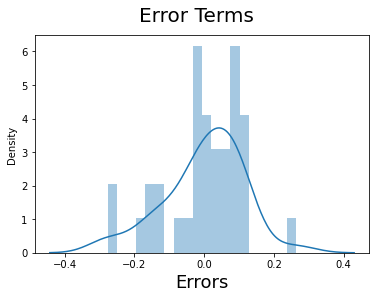

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse

0.11180250142210672

#### Making Predictions

##### Applying the scaling on the test sets

In [ ]:
col = df_test.columns

In [ ]:
df_test[col] = scaler.transform(df_test[col])

##### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('gmv')
x_test = df_test

In [ ]:
x_train_new.columns

Index(['const', 'discount_percent', 'Sponsorship_adstock',
       'product_procurement_sla'],
      dtype='object')

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[['discount_percent', 'Sponsorship_adstock', 'product_procurement_sla']]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(x_test_new)

Text(0, 0.5, 'y_pred')

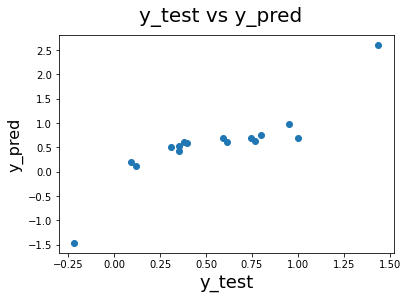

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label